In [1]:
# Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import dtale
import dtale as dtale_app # Importamos la libreria dtale para tener una mejor visualizacion de nuestro datadet

In [2]:
# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('AccidentesAviones.csv')

In [3]:
# Configurar la opción de visualización para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# Verificamos filas y columnas del dataset
df.shape

(5008, 18)

In [5]:
# Viasualizamos dataset 5 primeras filas
df.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [6]:
# Verificamos 5 últimas filas
df.tail()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."
5007,5007,"July 06, 2021",1500,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


In [7]:
# Visualizaremos las columnas para normalizarlas
df.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [8]:
# Renombramos las columnas
df = df.rename(columns ={'fecha':"FECHA", 'HORA declarada':"HORA", 'Ruta': "UBICACION", 'OperadOR':"OPERADOR", 'flight_no':"N.VUELO", 'route':"TIPO_VUELO",
       'ac_type':"TIPO_NAVE", 'registration':"REGISTRO", 'cn_ln':"CN_LN", 'all_aboard':"TOTAL_A_BORDO", 'PASAJEROS A BORDO':"PASAJEROS_A_BORDO",
       'crew_aboard':"TRIPULACION_A_BORDO", 'cantidad de fallecidos':"CANTIDAD_FALLECIDOS", 'passenger_fatalities':"PASAJEROS_FALLECIDOS",
       'crew_fatalities':"TRIPULACION_FALLECIDOS", 'ground':"FALLECIDOS_EN_SUELO", 'summary':"RESUMEN"})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   FECHA                   5008 non-null   object
 2   HORA                    5008 non-null   object
 3   UBICACION               5008 non-null   object
 4   OPERADOR                5008 non-null   object
 5   N.VUELO                 5008 non-null   object
 6   TIPO_VUELO              5008 non-null   object
 7   TIPO_NAVE               5008 non-null   object
 8   REGISTRO                5008 non-null   object
 9   CN_LN                   5008 non-null   object
 10  TOTAL_A_BORDO           5008 non-null   object
 11  PASAJEROS_A_BORDO       5008 non-null   object
 12  TRIPULACION_A_BORDO     5008 non-null   object
 13  CANTIDAD_FALLECIDOS     5008 non-null   object
 14  PASAJEROS_FALLECIDOS    5008 non-null   object
 15  TRIP

In [10]:
# Verificamos cambios, datos nulos, vamos a eliminar columna 'Unnamed' no brinda datos para el analisis
df = df.drop('Unnamed: 0', axis=1)

In [11]:
# Caambiamos el valor "?", por "0" 
df= df.replace({"?": "0"})

In [12]:
# Cambiamos tipos de datos para un mejor análisis
df['TOTAL_A_BORDO'] = df['TOTAL_A_BORDO'].astype('int64')
df['PASAJEROS_A_BORDO'] = df['PASAJEROS_A_BORDO'].astype('int64')
df['TRIPULACION_A_BORDO'] = df['TRIPULACION_A_BORDO'].astype('int64')
df['CANTIDAD_FALLECIDOS'] = df['CANTIDAD_FALLECIDOS'].astype('int64')
df['PASAJEROS_FALLECIDOS'] = df['PASAJEROS_FALLECIDOS'].astype('int64')
df['TRIPULACION_FALLECIDOS'] = df['TRIPULACION_FALLECIDOS'].astype('int64')
df['FALLECIDOS_EN_SUELO'] = df['FALLECIDOS_EN_SUELO'].astype('int64')

In [13]:
# Creamos una nueva columna y de 'UBICACION' separamos 'PAIS'
df['PAIS'] = df['UBICACION'].apply(lambda x: x.split(",")[-1].replace(" ", ""))

In [14]:
#df['TASA_SUPERVIVENCIA'] = (1 - (df['PASAJEROS_FALLECIDOS'] / df['PASAJEROS_A_BORDO'])) * 100

In [15]:
#df['TASA_MORTALIDAD'] = (df['PASAJEROS_FALLECIDOS'] / df['PASAJEROS_A_BORDO']) * 100

In [16]:
# Resumen de estadísticas descriptivas
summary_stats = df.describe()
print(summary_stats)

       TOTAL_A_BORDO  PASAJEROS_A_BORDO  TRIPULACION_A_BORDO  \
count    5008.000000        5008.000000          5008.000000   
mean       31.015575          25.691294             4.321885   
std        45.438768          43.405075             3.789422   
min         0.000000           0.000000             0.000000   
25%         6.000000           2.000000             2.000000   
50%        16.000000          11.000000             3.000000   
75%        34.250000          29.000000             6.000000   
max       644.000000         614.000000            83.000000   

       CANTIDAD_FALLECIDOS  PASAJEROS_FALLECIDOS  TRIPULACION_FALLECIDOS  \
count          5008.000000           5008.000000             5008.000000   
mean             22.258387             18.051917                3.418930   
std              34.983747             33.496574                3.193296   
min               0.000000              0.000000                0.000000   
25%               4.000000              0.0

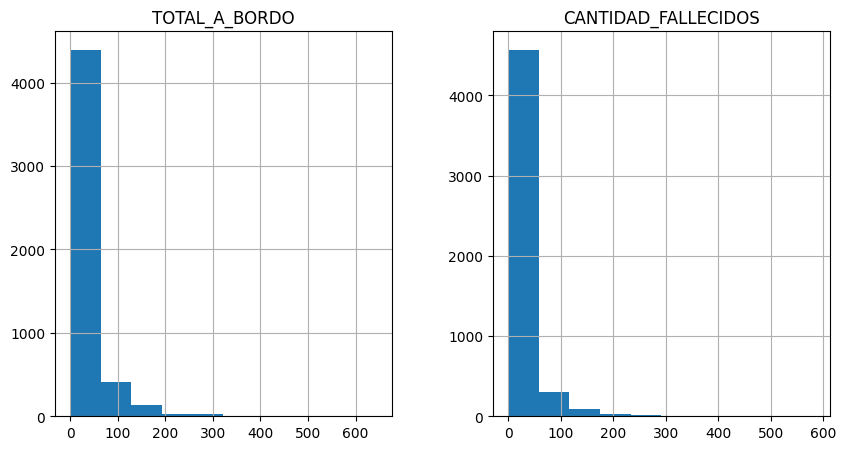

In [17]:
# Distribución de variables numéricas
numeric_vars = ['TOTAL_A_BORDO', 'CANTIDAD_FALLECIDOS']
df[numeric_vars].hist(bins=10, figsize=(10, 5))
plt.show()

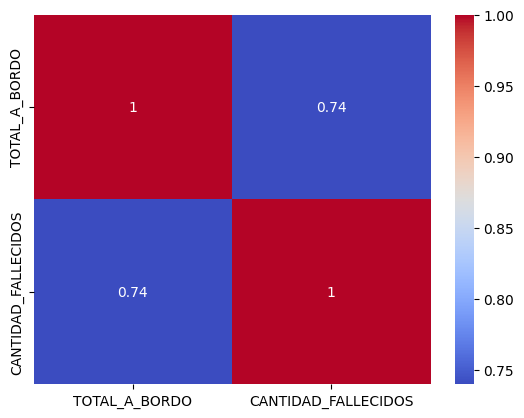

In [18]:
# Correlación entre variables numéricas
numeric_corr = df[numeric_vars].corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.show()

C:\Users\VANESSA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning:

) missing from current font.

C:\Users\VANESSA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 9 (	) missing from current font.



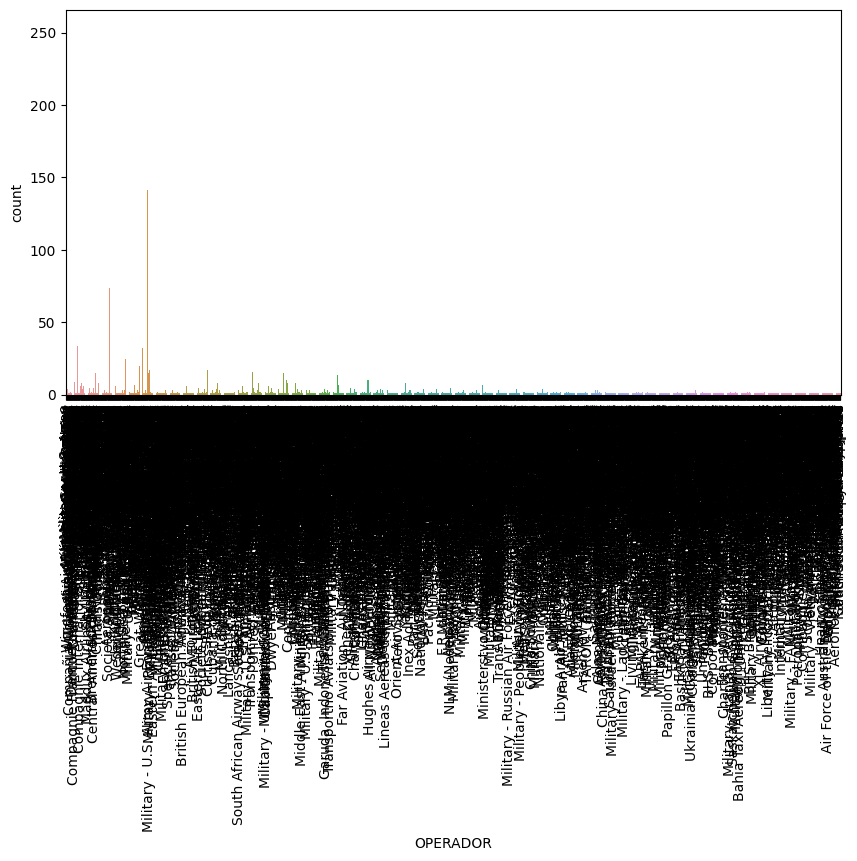

C:\Users\VANESSA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning:

) missing from current font.



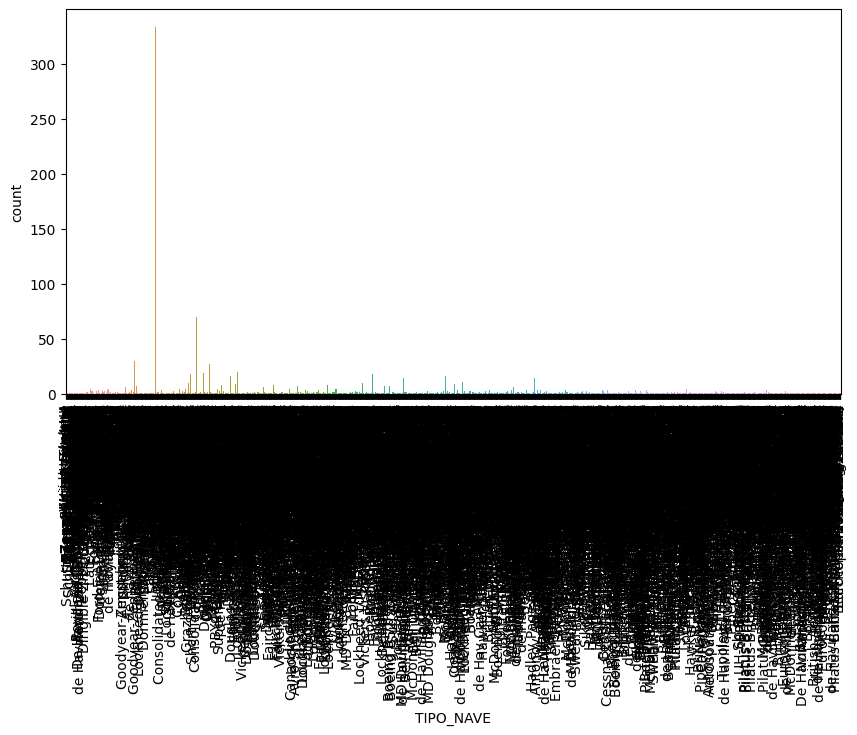

In [19]:
# Análisis de variables categóricas
categorical_vars = ['OPERADOR', 'TIPO_NAVE']
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=var)
    plt.xticks(rotation=90)
    plt.show()


In [20]:
incidentes_por_tipo = df['TIPO_NAVE'].value_counts()
incidentes_por_tipo


Douglas DC-3                                  333
de Havilland Canada DHC-6 Twin Otter 300       81
Douglas C-47A                                  70
Douglas C-47                                   64
Douglas DC-4                                   41
Antonov AN-26                                  35
Yakovlev YAK-40                                35
Junkers JU-52/3m                               30
De Havilland DH-4                              27
Douglas C-47B                                  27
Douglas DC-6B                                  27
Breguet 14                                     22
Douglas DC-6                                   20
Curtiss C-46A                                  19
Curtiss C-46                                   19
Antonov AN-24                                  19
McDonnell Douglas DC-9-32                      18
Antonov AN-12                                  18
Douglas C-47-DL                                18
Fokker F-27 Friendship 600                     17


In [21]:
incidentes_fecha = df['FECHA'].value_counts()
incidentes_fecha

August 31, 1988       4
September 11, 2001    4
February 23, 1945     3
December 28, 1946     3
August 27, 1992       3
September 03, 1978    3
October 11, 1985      3
July 19, 1989         3
December 25, 1946     3
December 31, 1970     3
September 17, 1929    3
November 29, 1944     3
January 25, 1947      3
July 12, 1951         3
June 06, 1944         3
September 02, 1958    3
March 08, 1962        3
May 29, 1947          3
May 13, 1957          3
November 23, 1962     3
September 10, 1962    3
January 13, 2005      3
April 02, 1969        3
November 27, 1947     3
April 10, 1953        3
January 18, 1988      3
September 14, 1999    3
January 06, 1974      3
July 30, 1971         3
November 11, 1945     3
July 28, 1943         2
October 22, 1943      2
October 12, 1962      2
August 14, 1982       2
December 14, 1962     2
October 25, 1991      2
February 19, 1952     2
July 16, 2002         2
January 14, 1963      2
May 07, 2002          2
May 25, 2002          2
March 05, 1963  

C:\Users\VANESSA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning:

) missing from current font.



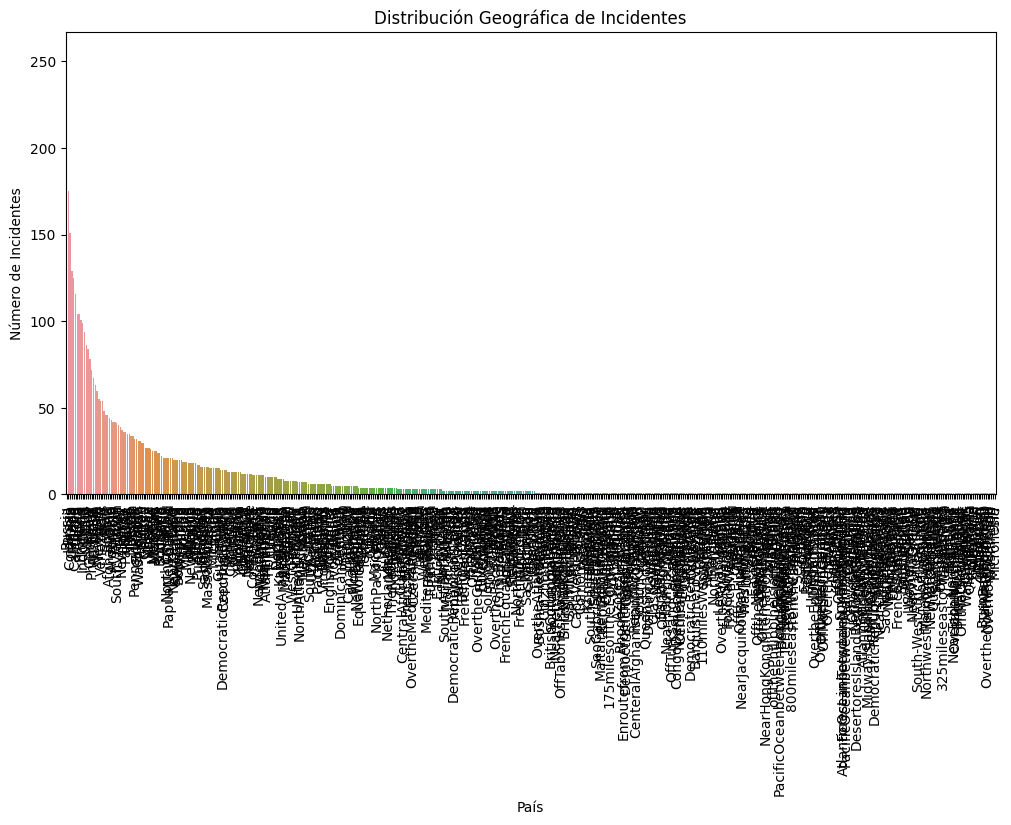

In [22]:
incidentes_por_pais = df['PAIS'].value_counts()

# Visualización en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=incidentes_por_pais.index, y=incidentes_por_pais.values)
plt.xlabel('País')
plt.ylabel('Número de Incidentes')
plt.title('Distribución Geográfica de Incidentes')
plt.xticks(rotation=90)
plt.show()


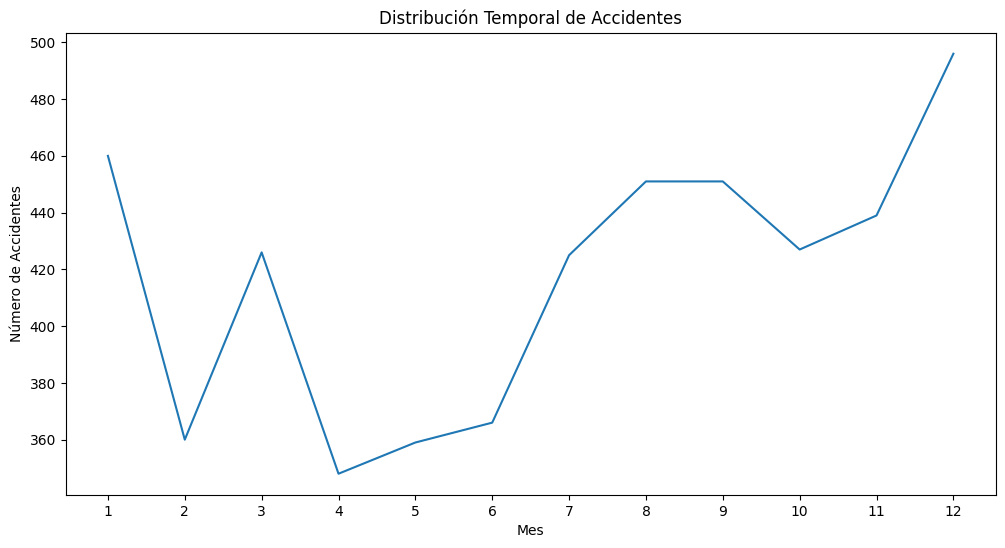

In [23]:
#Transformamos columna fecha a tipo fecha y creamos una nueva columna 'MES'
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['MES'] = df['FECHA'].dt.month  # Obtener el mes de la fecha del accidente

# Contar los accidentes por mes
accidentes_por_mes = df['MES'].value_counts().sort_index()

# Visualización en un gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(x=accidentes_por_mes.index, y=accidentes_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Número de Accidentes')
plt.title('Distribución Temporal de Accidentes')
plt.xticks(np.arange(1, 13))  # Establecer los valores del eje x como los meses del año
plt.show()


In [24]:
# Convertimos mes a texto
df['MES'] = df['FECHA'].dt.strftime('%B')

In [25]:
df.head()

,FECHA,HORA,UBICACION,OPERADOR,N.VUELO,TIPO_VUELO,TIPO_NAVE,REGISTRO,CN_LN,TOTAL_A_BORDO,PASAJEROS_A_BORDO,TRIPULACION_A_BORDO,CANTIDAD_FALLECIDOS,PASAJEROS_FALLECIDOS,TRIPULACION_FALLECIDOS,FALLECIDOS_EN_SUELO,RESUMEN,PAIS,MES
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,0,Demonstration,Wright Flyer III,0,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",Virginia,September
1,1909-09-07,0,"Juvisy-sur-Orge, France",0,0,Air show,Wright Byplane,SC1,0,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,France,September
2,1912-07-12,0630,"Atlantic City, New Jersey",Military - U.S. Navy,0,Test flight,Dirigible,0,0,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,NewJersey,July
3,1913-08-06,0,"Victoria, British Columbia, Canada",Private,0,0,Curtiss seaplane,0,0,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,Canada,August
4,1913-09-09,1830,Over the North Sea,Military - German Navy,0,0,Zeppelin L-1 (airship),0,0,20,0,0,14,0,0,0,The airship flew into a thunderstorm and encou...,OvertheNorthSea,September


In [26]:
df.to_csv('datos_accidentes.csv', index=False)

# Utilizando la libreria dtale para el EDA

In [27]:
# Importamos nuestro dataframe limpio para trabajar con la libreria dtale, para tener una mejor visualización del dataset
df1 = pd.read_csv('datos_accidentes.csv')

In [31]:
dtale.show(df1)